**SEABORN**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import collections as cll
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv


In [2]:
# Read Datas
median_house_hold_in_come = pd.read_csv("../input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("../input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("../input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
kill = pd.read_csv("../input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv", encoding="windows-1252")
share_race_city = pd.read_csv("../input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv", encoding="windows-1252")

In [3]:
# Poverty rate of each state - Her bir eyaletin yoksulluk oranı
percentage_people_below_poverty_level.info() # Data'nın poverty level kısmı hakkında genel bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [4]:
# Poverty rate of each state - Her bir eyaletin yoksulluk oranı
#percentage_people_below_poverty_level.poverty_rate.value_counts() # Datada 201 tane '-' şeklinde belirtilmiş poverty level var. Bu 201 '-' yi görmezden gelmeliyiz.

Text(0.5, 1.0, 'Poverty Rate Given States')

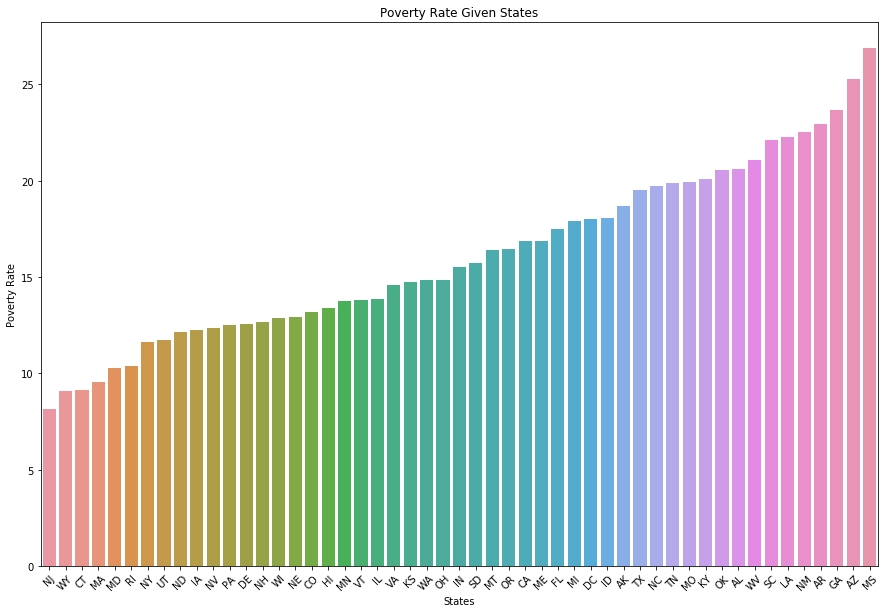

In [5]:
# Poverty rate of each state - Her bir eyaletin yoksulluk oranı
    # BarPlot
percentage_people_below_poverty_level.poverty_rate.replace(['-'], 0.0, inplace = True) # '-' yerine 0 yazılmasını sağlıyoruz.
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float) # Object olarak verilmiş poverty rate'leri sayıya çeviriyoruz.
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique()) # Datada verilen her bir unique eyaleti buluyoruz.
area_poverty_ratio = [] # Görselleştirme esnasında grafik, sıralı bir şekilde çıkması için datayı sıralıyoruz
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list, 'area_poverty_ratio': area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=True)).index.values
sorted_data = data.reindex(new_index)

# visualization / görselleştirme / BARPLOT
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

In [6]:
# Most common 15 Name or Surname of killed people / Öldürülen insanların isimleri veya soyisimleri arasından en çok kullanılan 15 tanesi
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [7]:
# kill.name.value_counts() # Burada isimleri frekanslarına göre sıraladığımızda TK TK kayıtlı 49 kişi görüyoruz. Böyle bir verinin olmamasını istiyoruz.

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

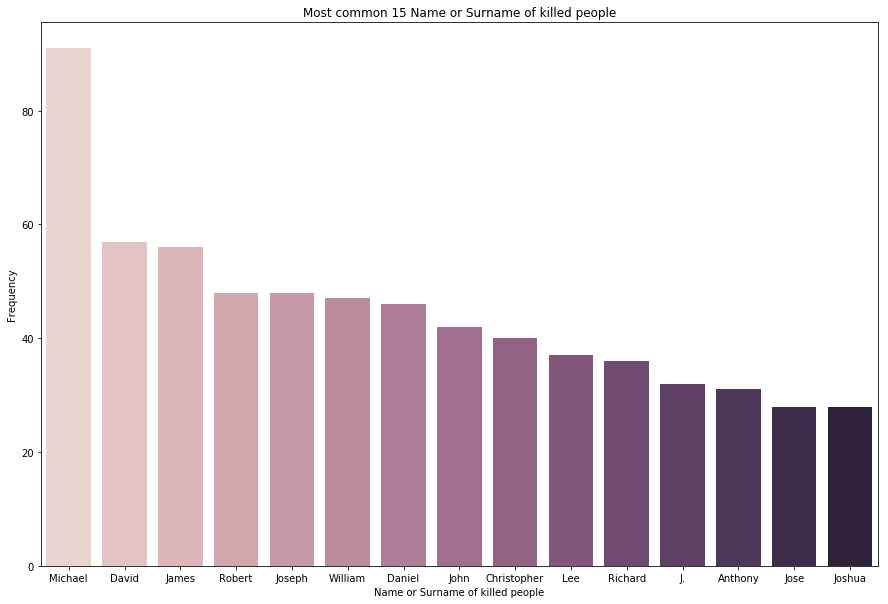

In [8]:
# Most common 15 Name or Surname of killed people / Öldürülen insanların isimleri veya soyisimleri arasından en çok kullanılan 15 tanesi
    # BarPlot
separate = kill.name[kill.name != 'TK TK'].str.split()
a,b = zip(*separate)
name_list = a+b
name_count = cll.Counter(name_list)
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x,y = list(x), list(y)

# visualization / görselleştirme
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y, palette=sns.cubehelix_palette(len(x))) # palette: x uzunluğu kadar birbirleriyle alakalı farklı renk üretiyor.
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

In [9]:
# High school graduation rate of the population that is older than 25 in states / Eyaletlerde 25 yaşından büyük nüfusun lise mezuniyet oranı
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [10]:
#percent_over_25_completed_highSchool.percent_completed_hs.value_counts() # Bu veride 197 tane cevabını bilmediğimiz satır var. Bu satırları 0'a çevirmeliyiz.

Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

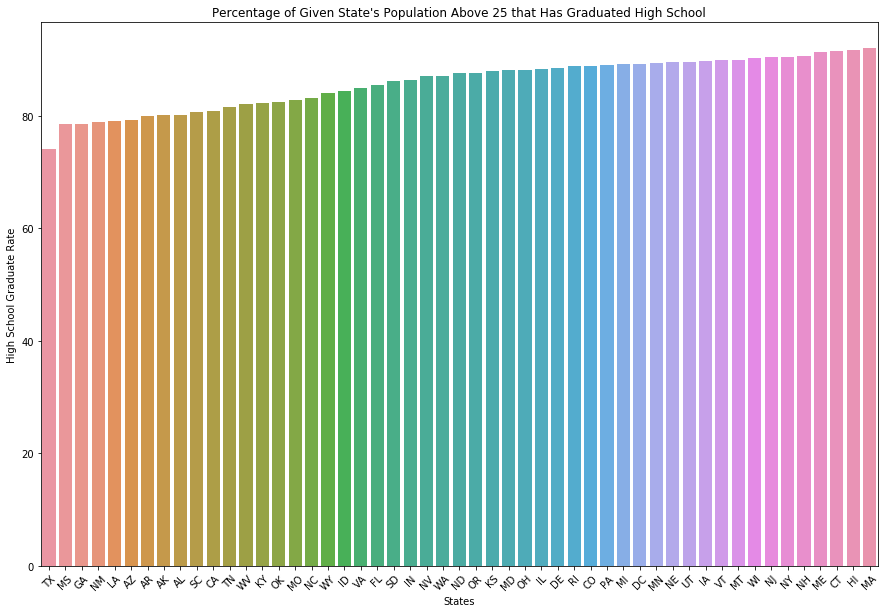

In [11]:
# High school graduation rate of the population that is older than 25 in states / Eyaletlerde 25 yaşından büyük nüfusun lise mezuniyet oranı
    # BarPlot
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace=True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float) # String olan değerlerimizi floata çeviriyoruz.
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique()) # Eyaletleri unique şekilde alıyoruz.
area_highschool = []
for i in area_list: # Unique eyaletleri filtreleyerek, highschool tamamlayanları buluyoruz.
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# Sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
# Visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

In [12]:
# Percentage of states population according to races that are black, white, native american, asian and hispanic / Eyaletlerde bulunan insanların etnik kökenlerinin oranları
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [13]:
share_race_city.info() # Object olan değerlerimizi floata çevirmemiz gerekiyor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races")]

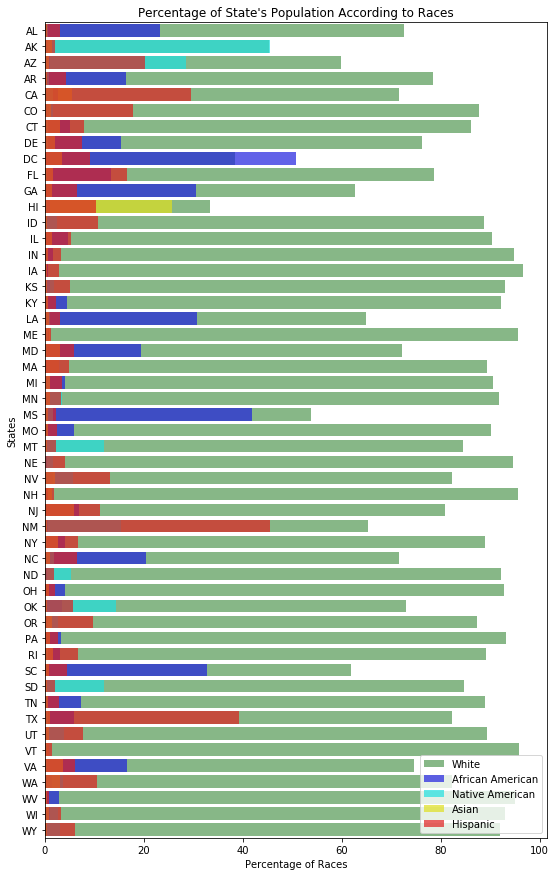

In [14]:
# Percentage of states population according to races that are black, white, native american, asian and hispanic / Eyaletlerde bulunan insanların etnik kökenlerinin oranları
    # Horizontal BarPlot / Yatay BarPlot 
share_race_city.replace(['-'], 0.0, inplace=True)
share_race_city.replace(['(X)'], 0.0, inplace=True)
share_race_city.loc[:,['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = share_race_city.loc[:,['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area'] == i]
    share_white.append(sum(x.share_white) / len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

# Visualization / Görselleştirme
f,ax = plt.subplots(figsize=(9,15)) # x ve y eksenlerinin uzunluğu
sns.barplot(x = share_white, y = area_list, color = 'green', alpha = 0.5, label = 'White') # Alpha: Saydamlık
sns.barplot(x = share_black, y = area_list, color = 'blue', alpha = 0.7, label = 'African American')
sns.barplot(x = share_native_american, y = area_list, color = 'cyan', alpha = 0.7, label = 'Native American')
sns.barplot(x = share_asian, y = area_list, color = 'yellow', alpha = 0.7, label = 'Asian')
sns.barplot(x = share_hispanic, y = area_list, color = 'red', alpha = 0.7, label = 'Hispanic')

ax.legend(loc = 'lower right', frameon = True) # Legendların görünümü
ax.set(xlabel = 'Percentage of Races', ylabel = 'States', title = "Percentage of State's Population According to Races")

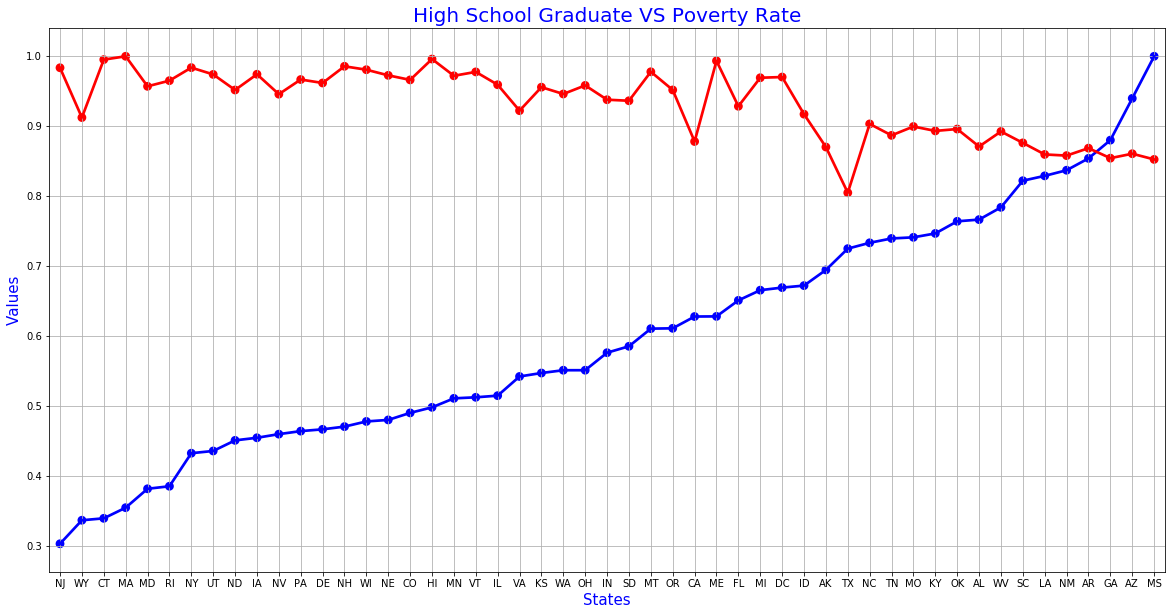

In [15]:
# High school graduation rate vs poverty rate of each state / Herbir eyaletteki liseden mezun olma ve fakirlik oranı
    # PointPlot
# sorted_data ' yı önceden bulmuştuk. Bu data eyaletlerin fakirlik oranlarının ortalamasını gösteriyor.
# sorted_data2 ' yi önceden bulmuştuk. Bu data eyaletlerde ki mezun olma durumunu gösteriyor.
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio'] / max(sorted_data['area_poverty_ratio']) # Normalization / Normalizasyon
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio'] / max(sorted_data2['area_highschool_ratio']) # Normalization / Normalizasyon
data = pd.concat([sorted_data, sorted_data2['area_highschool_ratio']], axis = 1) # Datalarımızı yanyana birleştiriyoruz.
data.sort_values('area_poverty_ratio', inplace = True) 

# Visualize / Görselleştirme
f,ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x = 'area_list', y = 'area_poverty_ratio', data = data, color = 'blue', alpha = 0.8)
sns.pointplot(x = 'area_list', y = 'area_highschool_ratio', data = data, color = 'red', alpha = 0.8)
'''plt.text(40, 0.6, 'high school graduate ratio', color = 'red', fontsize = 17, style = 'italic')  # Red : HighSchool Graduate Ratio
plt.text(40, 0.55, 'poverty ratio', color = ' lime', fontsize = 18, style = 'italic')'''            # Blue : Poverty Ratio
plt.xlabel('States', fontsize = 15, color = 'blue')
plt.ylabel('Values', fontsize = 15, color = 'blue')
plt.title('High School Graduate VS Poverty Rate', fontsize = 20, color = 'blue')
plt.grid()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


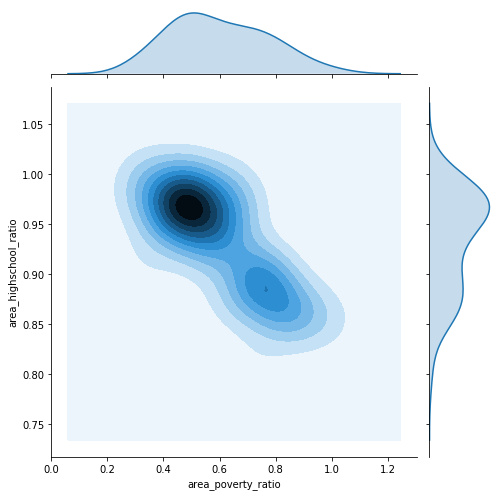

' Pearsonr : 2 tane eksen arasında ki (x,y) korelasyonu / aralarındaki ilişkiyi gösterir.\nPearsonr katsayısı 1 ise: Pozitif korelasyon\nPearsonr katsayısı -1 ise: Negatif korelasyon\nPearsonr katsayısı 0 ise: Korelasyon yok'

In [16]:
# High school graduation rate vs poverty rate of each state / Herbir eyaletteki liseden mezun olma ve fakirlik oranı
    # JointPlot
# Daha önceden elimizde bulunan data'yı kullanıyoruz.
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind = "kde", size = 7) # kde: Kernel Density Estimation
plt.show()
''' Pearsonr : 2 tane eksen arasında ki (x,y) korelasyonu / aralarındaki ilişkiyi gösterir.
Pearsonr katsayısı 1 ise: Pozitif korelasyon
Pearsonr katsayısı -1 ise: Negatif korelasyon
Pearsonr katsayısı 0 ise: Korelasyon yok'''

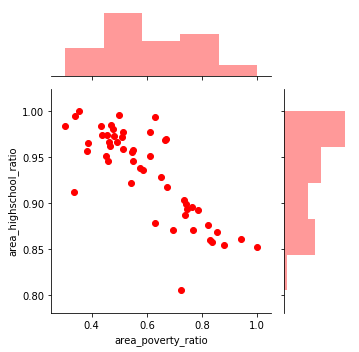

In [17]:
# Joint plot farklı parametre kullanımı ile de yapılabilir.
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data = data, size = 5, ratio = 3, color = "r")

In [18]:
# Race rates accorging in kill data / Öldürülen insanların ırk oranları

kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

Text(0.5, 1.0, 'Killed People According to Races')

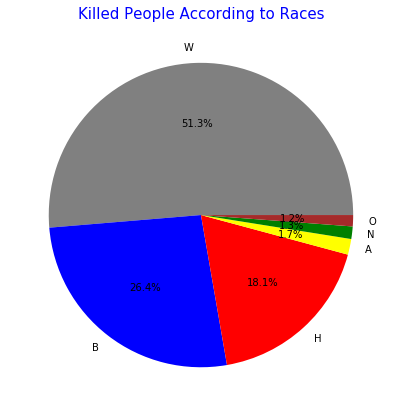

In [19]:
# Race rates according in kill data / Öldürülen insanların ırkların oranı
    # PiePlot
kill.race.dropna(inplace = True) # Irk kolonu boş ise bu kolonu datadan çıkart
labels = kill.race.value_counts().index # Datada hangi ırktan kaç tane olduğunu döndürüyor.
colors = ['grey', 'blue', 'red', 'yellow', 'green', 'brown']
explode = [0, 0, 0, 0, 0, 0]
sizes = kill.race.value_counts().values

# Visual
plt.figure(figsize = (7, 7))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('Killed People According to Races', color = 'blue', fontsize = 15)

In [20]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


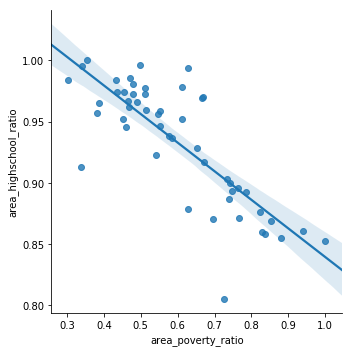

In [21]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# Fakirlik oranı ile liseden mezun olma oranının karşılaştırılması
    # LmPlot
        # Show the results of a linear regression within each dataset
        # Linear Regression
sns.lmplot(x = "area_poverty_ratio", y = "area_highschool_ratio", data = data) # X ekseni fakirlik oranı, y ekseni liseden mezun olma oranı, datasetimiz ise data olarak tanımlanmış dataset
plt.show() # Bu line'ı çizerken linear regression kullanılıyor.

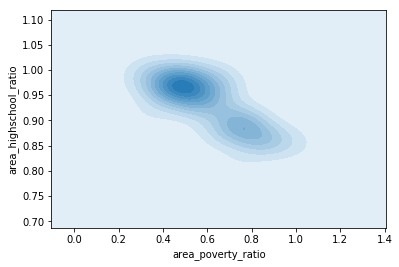

In [22]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# Fakirlik oranı ile liseden mezun olma oranının karşılaştırılması
    # CubehelixPlot
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade = True, cut = 5) # X ekseni yoksulluk, Y ekseni liseden mezun olma oranı olsun. 'Shade', koyuluk. 'Cut' ise büyüklük
plt.show()

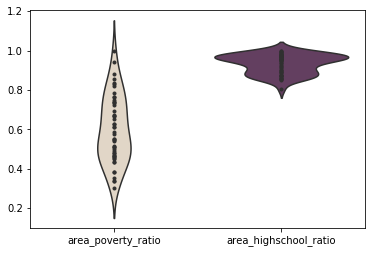

In [23]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
    # ViolinPlot
pal = sns.cubehelix_palette(2, rot = .5, dark = .3) # Seaborn Palette
sns.violinplot(data = data, palette = pal, inner = "points") # inner points'in her biri bizim data pointimiz
plt.show()
# Sadece sayısal şeyleri görselleştiriyor. Çok kullanışlıdır.

In [24]:
# Correlation Map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
data.corr() # İki veri arasında ki korelasyon

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


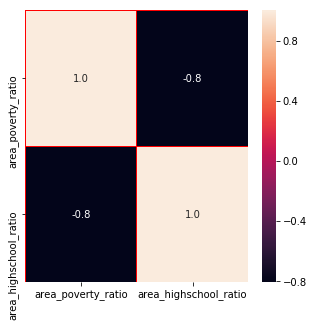

In [25]:
# Correlation Map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
    #HeatMap
# HeatMap: Genellikle korelasyonu görselleştirmek için kullanılıyor.
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(data.corr(), annot = True, linewidths = .5, linecolor = "red", fmt = '.1f', ax = ax)
plt.show()

In [26]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


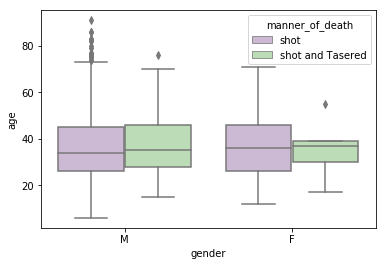

In [27]:
# Ölüm şekline göre cinsiyet ve yaş sınıflandırılması
# Manner of Death(Ölüm Şekli): Ateş edilerek, Ateş edilerek ve şok tabancasıyla
# Gender: Cinsiyet
# Age: Yaş
# Plot the orbital period with horizontal boxes
    #BoxPlot
sns.boxplot(x = "gender", y = "age", hue = "manner_of_death", data = kill, palette = "PRGn")
plt.show()

In [28]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


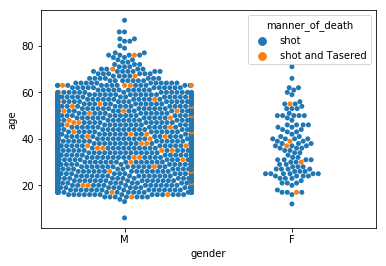

In [29]:
# Ölüm şekline göre cinsiyet ve yaş sınıflandırılması
# Manner of Death(Ölüm Şekli): Ateş edilerek, Ateş edilerek ve şok tabancasıyla
# Gender: Cinsiyet
# Age: Yaş    
    # SwarmPlot
sns.swarmplot(x = "gender", y = "age", hue = "manner_of_death", data = kill)
plt.show()
 # Classification algoritmalarında datanın nasıl ayrılacağını net bir şekilde gösterir.
        # Dezavantajı: Data sayısı çok fazla ise çizim yapılamayacak.

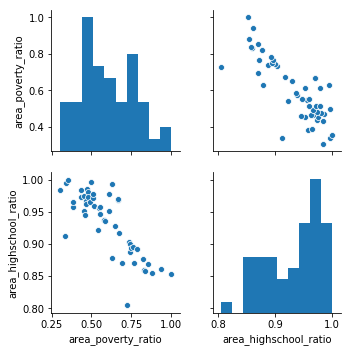

In [30]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# Fakirlik oranı ile liseden mezun olma oranının karşılaştırılması
    # PairPlot
sns.pairplot(data)
plt.show()

In [31]:
kill.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

In [32]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

Text(0.5, 1.0, 'gender')

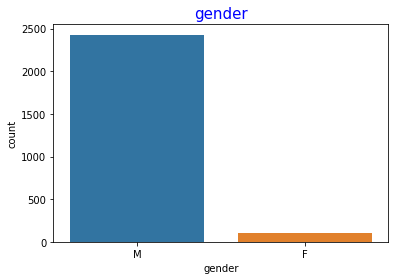

In [33]:
# Kill properties / Öldürme özellikleri
# Manner of Death
    # CountPlot
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender", color = "blue", fontsize = 15)

Text(0.5, 1.0, 'Kill Weapon')

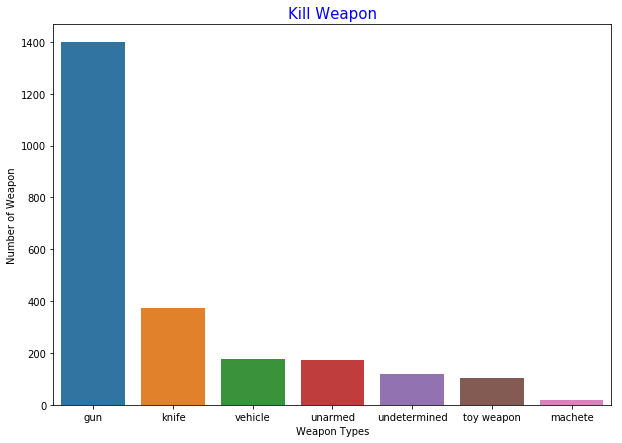

In [34]:
# Kill Weapon
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize = (10, 7))
sns.barplot(x = armed[:7].index, y = armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill Weapon', color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Age of Killed People')

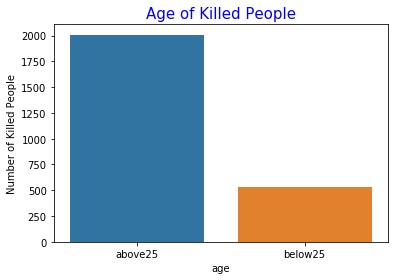

In [35]:
# Age of Kill People
above25 = ['above25' if i >= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age': above25})
sns.countplot(x = df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of Killed People', color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Race of Killed People')

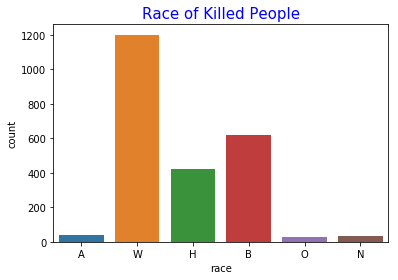

In [36]:
# Race of Killed People
sns.countplot(data = kill, x = 'race')
plt.title('Race of Killed People', color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Most Dangerous Cities')

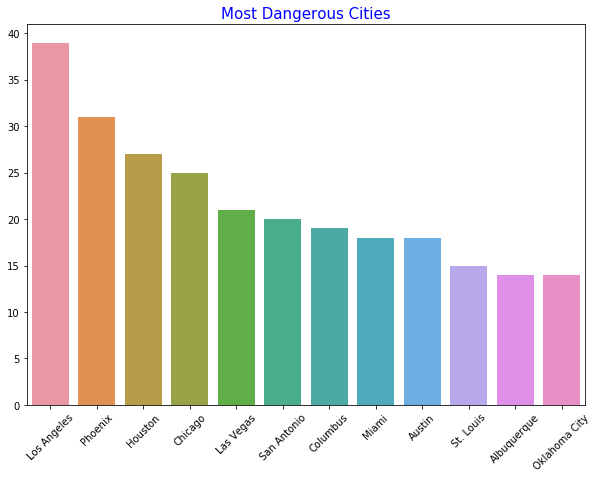

In [37]:
# Most Dangerous Cities
city = kill.city.value_counts()
plt.figure(figsize = (10, 7))
sns.barplot(x = city[:12].index, y = city[:12].values)
plt.xticks(rotation = 45)
plt.title('Most Dangerous Cities', color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Most Dangerous State')

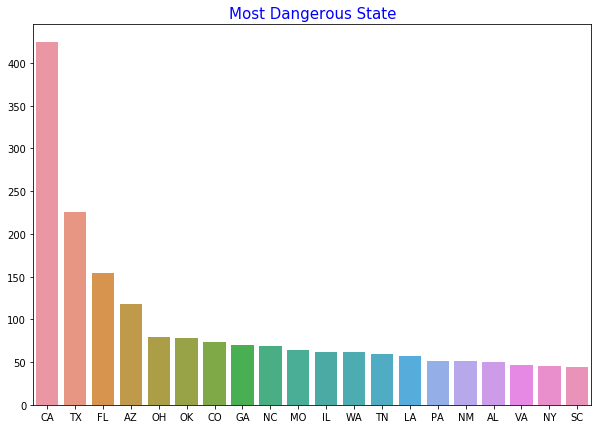

In [38]:
# Most Dangerous States
state = kill.state.value_counts()
plt.figure(figsize = (10, 7))
sns.barplot(x = state[:20].index, y = state[:20].values)
plt.title('Most Dangerous State', color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Having mental illness or not')

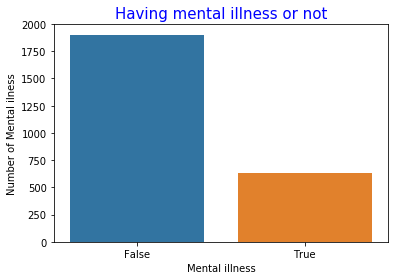

In [39]:
# Having mental ilness or not for killed people
# Öldürülen insanların akıl hastalığı olup olmaması
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental ilness')
plt.title('Having mental illness or not', color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Threat Types')

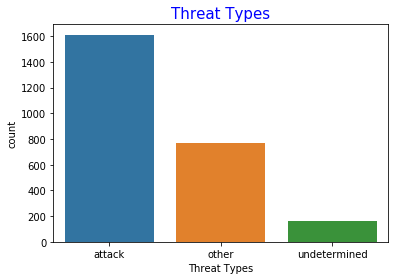

In [40]:
# Threat Types / Tehdit Türleri
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat Types', color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Kill Numbers from States')

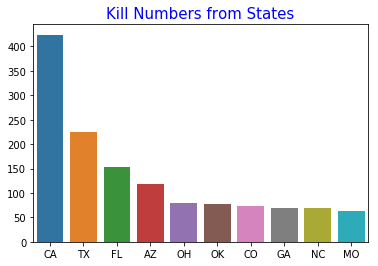

In [41]:
# Kill numbers from states in kill data
# Eyaletlerde öldürme sayıları
sta = kill.state.value_counts().index[:10]
sns.barplot(x = sta, y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States', color = 'blue', fontsize = 15)